In [1]:
import time
import random
import array
import pandas as pd
import numpy as np
#from threading import Thread 
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
#from BlasterDatacollection import dataB
from Movements import move_posY,move_negY,move_posX,move_negX
import config_constants as cc

<IPython.core.display.Javascript object>

In [2]:
#time of each move (change for each velocity trial)
runtime = 1.0 #sec 
#using config voltage
voltage = cc.voltage 

#enter a name for this test, the timestamp will be added and it will become the CSV name
name = 'AutoVelocityTest'
t = time.localtime()
current_time = time.strftime('_%Y%m%d_%H%M%S', t)
name = name+current_time #name of the CSV file will be the name that you chose plus the date and time
print(name)

AutoVelocityTest_20230314_143853


<IPython.core.display.Javascript object>

,original_pos_xy,Final_pos_xy,max_xy,min_xy,Radius_x,Radius_y,Area
0,"(9.719750000000001, 7.110250000000001)","([9.719750000000001], [7.110250000000001])","(9.719750000000001, 7.110250000000001)","(9.719750000000001, 7.110250000000001)",0.0,0.0,0.0


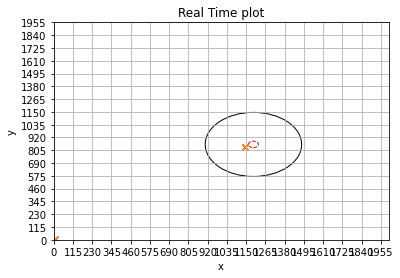

(9.719750000000001, 7.110250000000001)

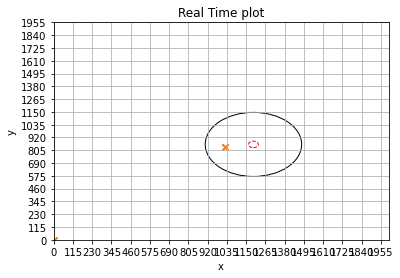

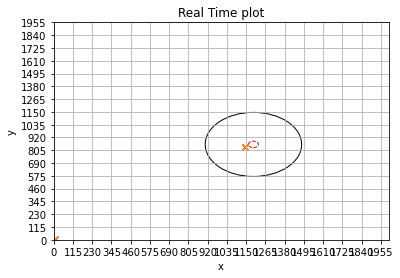

In [3]:
#starts by centering the piezo and saving an initial location
x,y = grab_location('junk')
#center_piezo()
moveXY(cc.circle['circle_x']-x,cc.circle['circle_y']-y) #send the piezo back to the center of config range
grab_location(name)

<IPython.core.display.Javascript object>

,original_pos_xy,Final_pos_xy,max_xy,min_xy,Radius_x,Radius_y,Area
0,"(8.47025, 7.110250000000001)","([8.46175], [7.11875])","(8.47025, 7.11875)","(8.46175, 7.110250000000001)",0.00425,0.00425,0.006673


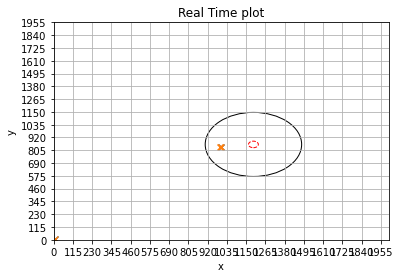

AutoTest complete.


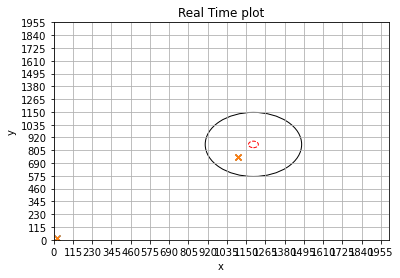

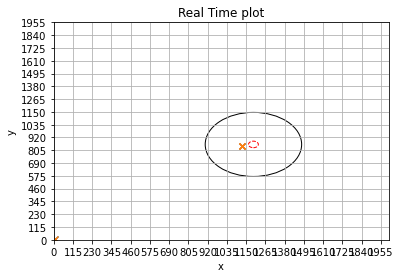

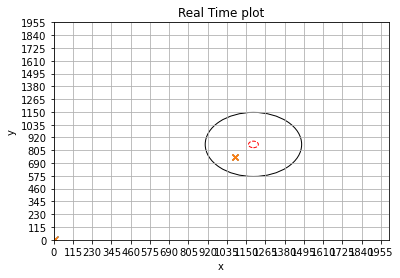

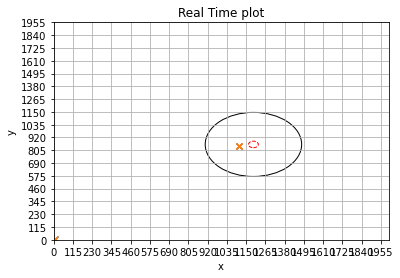

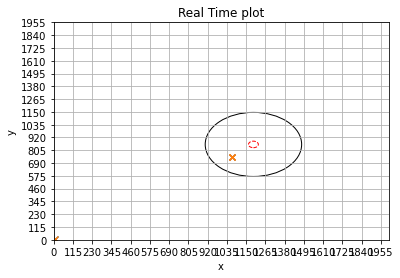

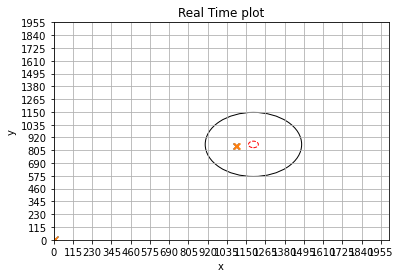

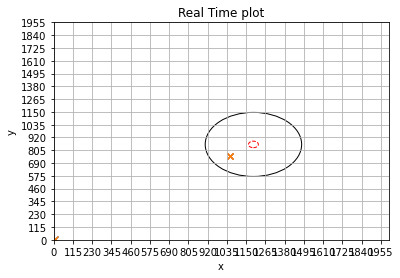

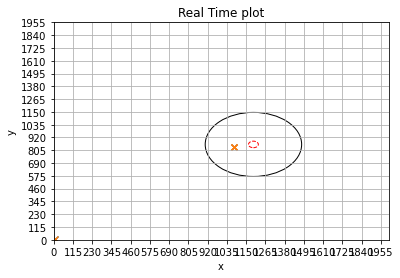

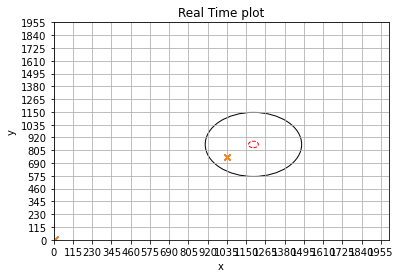

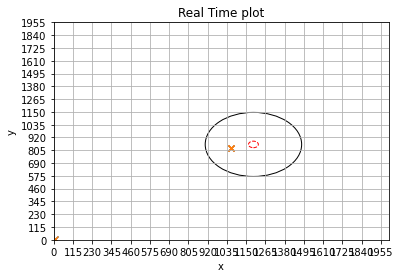

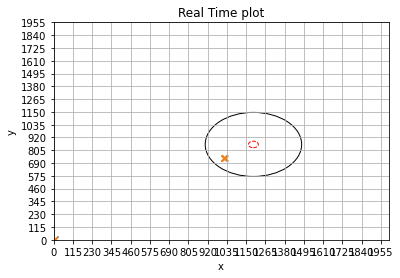

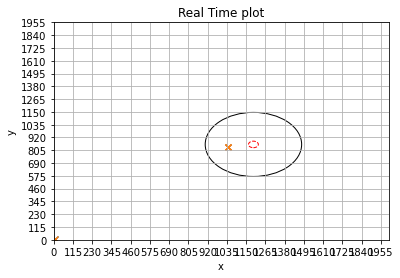

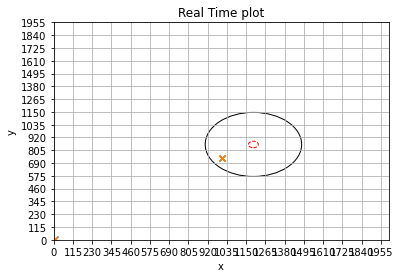

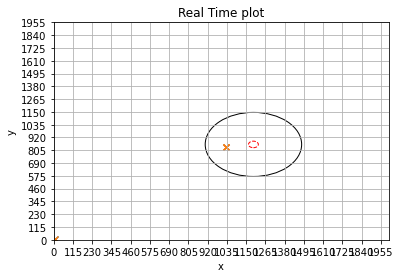

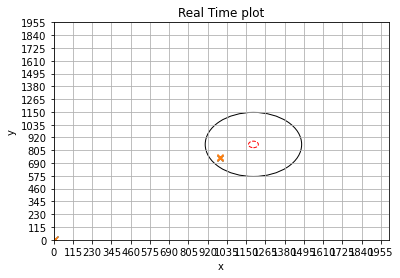

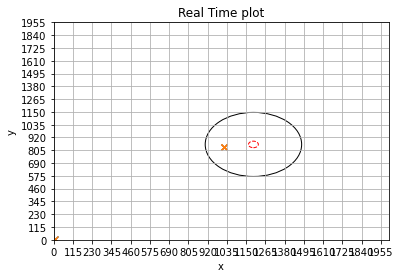

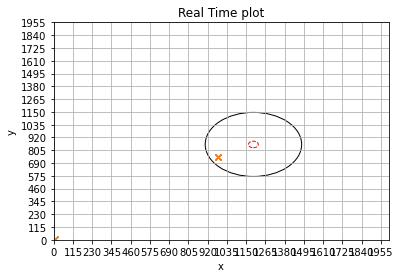

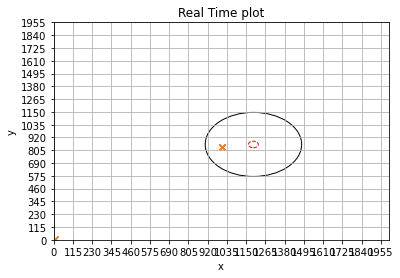

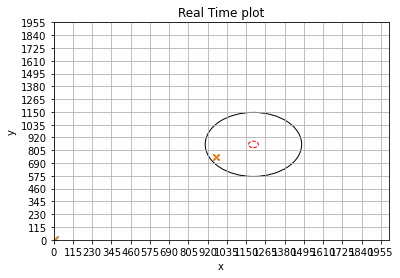

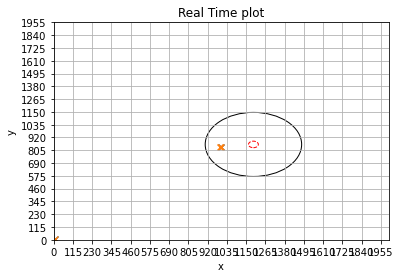

In [4]:
#loop through the test for n trials
trials = 10
n = 1 
while n <= trials: #number of trials
    print('trial #',n)
    move_negY(voltage,runtime) #select the movement direction to test
    #time.sleep(2)
    grab_location(name) #add new location to CSV
    move_posY(voltage,runtime) #send the piezo back to the center
    #time.sleep(2)
    grab_location(name) #add new location to CSV
    n += 1 
else:
    print('AutoTest complete.')

In [5]:
headers = ['X (mm)', 'Y (mm)']
data = pd.read_csv('.\Results\%s.csv' % name, names=headers) #select your file
start = data.iloc[2::2, :]
end = data.iloc[1::2, :]

In [6]:
endx = end['X (mm)'].tolist()
endy = end['Y (mm)'].tolist()
startx = start['X (mm)'].tolist()
starty = start['Y (mm)'].tolist()

xdiffs = np.subtract(endx, startx)
xdiffs = list(xdiffs)
xdiffs = [ele for ele in xdiffs if abs(ele) < 1]

ydiffs = np.subtract(endy, starty)
ydiffs = list(ydiffs)
ydiffs = [ele for ele in ydiffs if abs(ele) < 1]

print(xdiffs,ydiffs)

def Average(lst):
    return sum(lst) / len(lst)

print(Average(xdiffs))
print(Average(ydiffs))

[-0.19549999999999912, -0.20400000000000063, -0.21250000000000036, -0.19549999999999912, -0.17850000000000144, -0.19549999999999912, -0.21250000000000036, -0.1955000000000009, -0.20400000000000063, -0.21250000000000036] [-0.8244999999999996, -0.8245000000000005, -0.8075000000000001, -0.7054999999999998, -0.7225000000000001, -0.8244999999999996, -0.7990000000000004, -0.7989999999999995, -0.7905000000000006, -0.8075000000000001]
-0.2006000000000002
-0.7905
